## Step 1: Reading and Understanding the Data

In [1]:
##Step 1: Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
## importing warnings to suppress temporary warnings.

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Data reading and understanding  from csv file

rental_bike = pd.read_csv('day.csv')

In [4]:
## to Check the head of the dataset
 
rental_bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
##checking the shape of dataframe to find out the rows and columns present

rental_bike.shape

(730, 16)

In [6]:
## describing the columns of dataframe to view all the variables

rental_bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
# get into info to print a concise summary of the dataframe

rental_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking  the null values in column data if any

rental_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#### we have some columns named as yr,mnth,hum which creates confusion so lets change the column names and replace with the new ones.

rental_bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
rental_bike.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        6           0   
1        2  02-01-2018       1     0      1        0        0           0   
2        3  03-01-2018       1     0      1        0        1           1   
3        4  04-01-2018       1     0      1        0        2           1   
4        5  05-01-2018       1     0      1        0        3           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [11]:
## Now, we shall check for duplicate values so Copying the dataframe into new one will keep the data intact

rental_bike_copy = rental_bike.copy()

In [12]:
rental_bike_copy.shape

(730, 16)

In [13]:
# to check and see the exact number of duplicate let's drop the duplicates

rental_bike_copy.drop_duplicates(inplace=True)

In [14]:
# Then, we shall re-verify the shape of new dataframe to see if there is any duplicate values dropped

rental_bike_copy.shape

(730, 16)

#### We can see that  the shape has the  same after dropping duplicates, indicates that  there are no duplicates in the original dataframe as well.

In [15]:
# Now,we shall drop the unwanted columns which are not relevant
# we can also see that the variable instant has only index for the row so we can drop it, dteday has date which can be accompany by year and month column,
# Also, casual + registered seems to be the breakup by category for cnt column.

rental_bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
## As we have dropped the above variables, let's reorganize the remaining variables such as month,season,weekday,weathersit and map them
## for season column mapping
## Now,mapping the season column

rental_bike.season = rental_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
## Now,mapping the month column

rental_bike.month = rental_bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
## Now, mapping the weekday column

rental_bike.weekday = rental_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
## Now, mapping the weathersit column

rental_bike.weathersit = rental_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
##Now, let's check the head of the dataset

rental_bike.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [21]:
rental_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

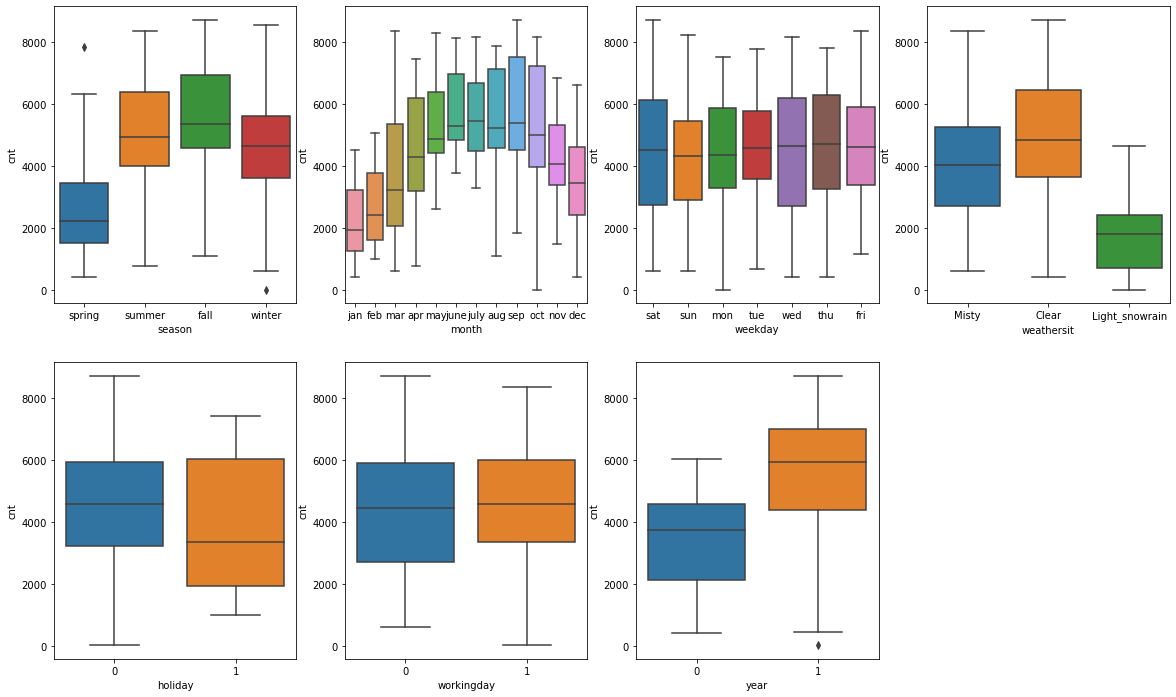

In [22]:
## As we have mapped all the columns, let's visualize each variable.
## also we can observe how the predictor variables stand with the targeted variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = rental_bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental_bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental_bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental_bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental_bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = rental_bike)
plt.show()

In [23]:
## as we know we have categorical columns such as  season,month,year,holiday,weekday,working day .so lets draw barplot to view all these.

def plot_cat_columns(column):
    plt.figure(figsize = (15,8))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=rental_bike)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=rental_bike, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

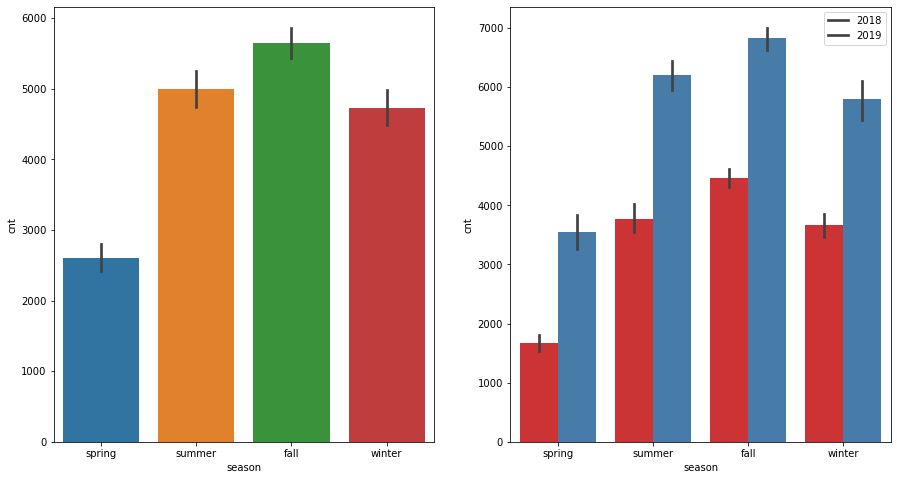

In [24]:
##let's plot for season column


plot_cat_columns('season')

## from the above plot we can observe that in the fall season the demand is high and attracts more bookings.Looking at the plot we can also state that the cycle booking counts have increased momentously. 

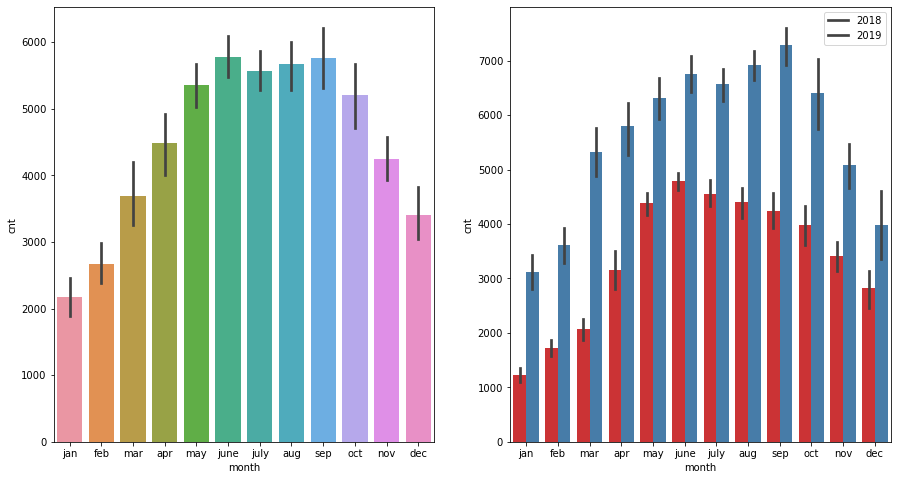

In [25]:
##let's plot for month column

plot_cat_columns('month')

## from the above plot, we can observe that the bookings have increased from 5th,6th,7th,8th,9th,10th i.e in the month of may,june,july,aug,sept & oct
## The trending graph shows that booking increased in the starting of the year then kept its number high and decreased at the end of the year.But, the number of bookoings have increased in 2019 in comparsion to 2018


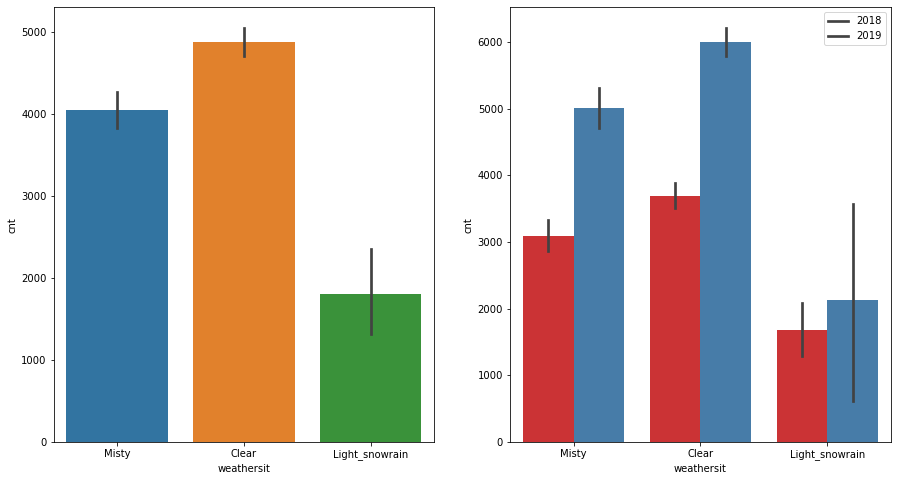

In [26]:
# let's plot for weathersit column

plot_cat_columns('weathersit')

## from the above plot,Extreme weather condition decrease the bookings, where we can observe clearly that a clement weather attract more bookings.
## in comparison to 2018,year 2019 attracted more bookings in each climate condition.

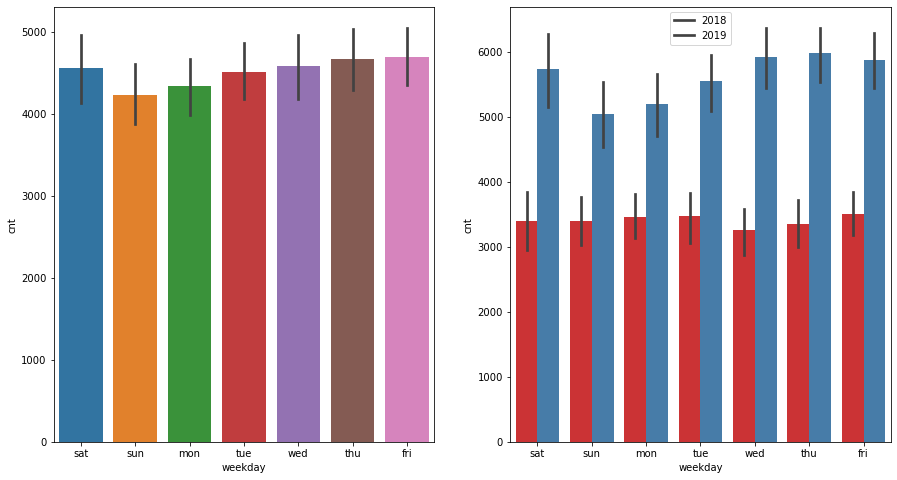

In [27]:
# let's plot for weekday column

plot_cat_columns('weekday')

## From the above plot wed, Thu,Fri,sat & have more number of bookings as compared to the other days of the week.

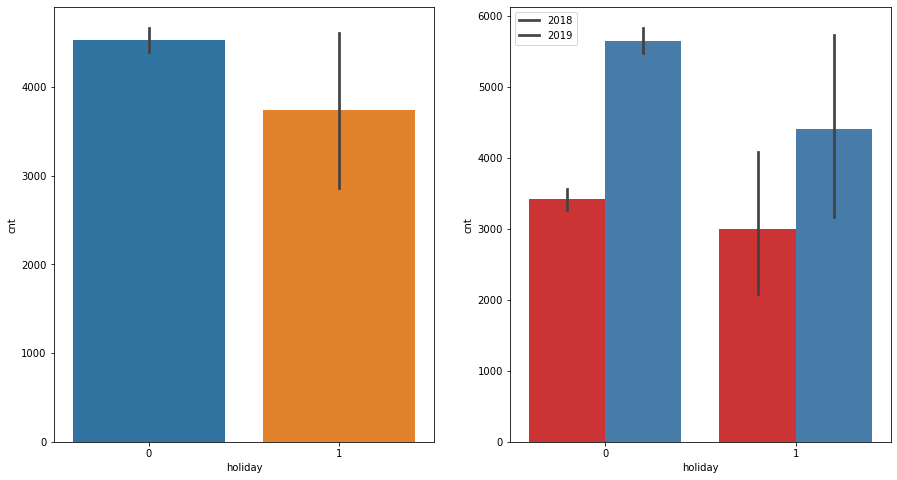

In [28]:
# let's plot for  holiday column

plot_cat_columns('holiday')

## From the above plot, it says in non-holidays the bookings declined resonably as on holiday, people mostly spend time with their family.

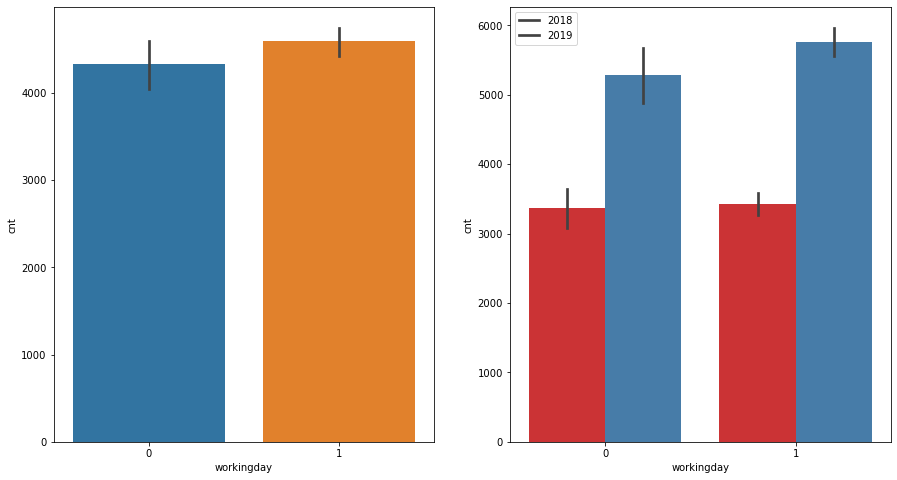

In [29]:
# let's plot for workingday column

plot_cat_columns('workingday')

## from the above plot, bookings in working days is marginally higher than the non-working days or we can assume almost same.But the booking number has increased in 2019 as compared to 2018

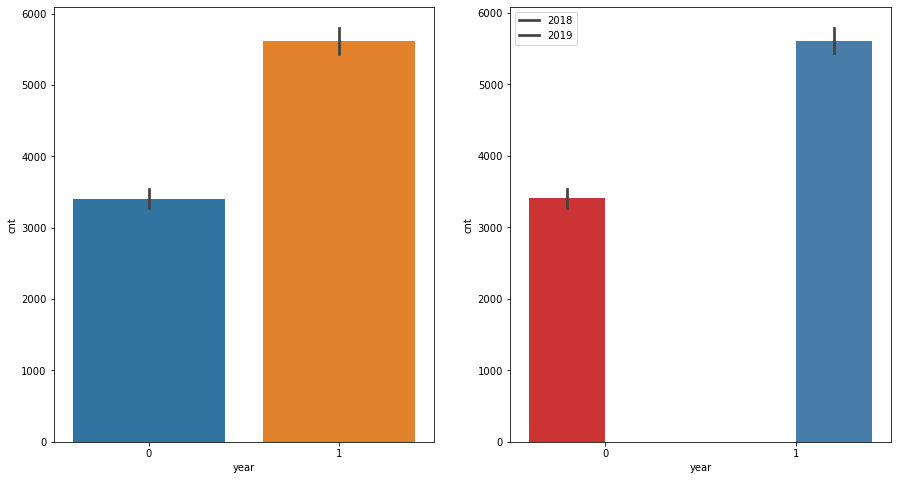

In [30]:
# let's plot for year column

plot_cat_columns('year')

## from the above plot we can see the year 2019 has a good number of bookings as compared to 2018.So we must say 2019 was a successful year for the business. 

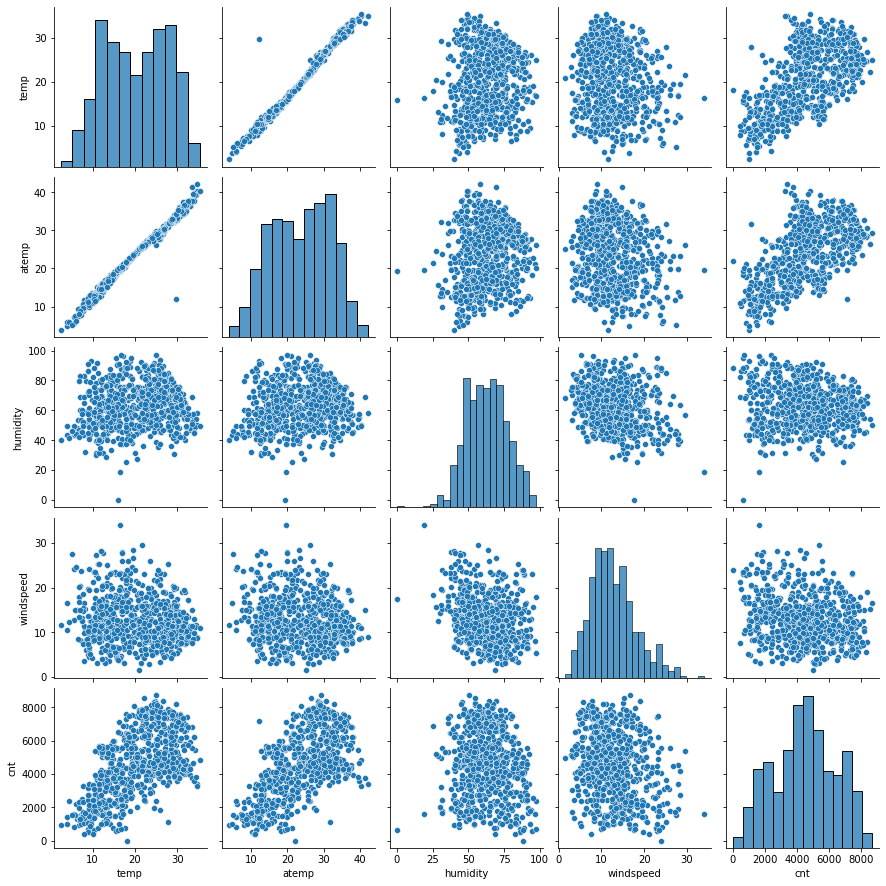

In [31]:
## As we have plotted for all the categorical variables, now is the time to plot for the numerical columns.
## we will use the pairplot from seaborn library to plot multiplepairwise bivariate distributions.

sns.pairplot(data=rental_bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

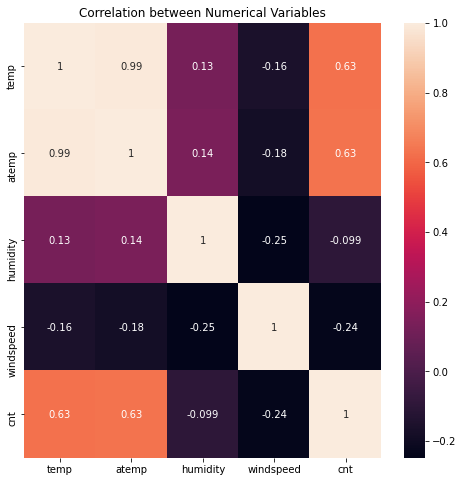

In [32]:
## As the next step, we shall check if the variableshave a linear relationship and also to check the strength of the relationship


plt.figure(figsize = (8,8))
matrix = np.triu(rental_bike[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(rental_bike[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

#### As we can see here is linear relationship between temp and atemp. Due to multicolinearity both of the parameters cannot be used in the model .So,  we will decide  based on VIF and p-value w.r.t other variables which parameters to keep or to drop

## Step 3: Data Preparation

In [33]:
# Now we will create Dummy variable  for month, weekday, weathersit and season variables to check the unnecessary clms

months_rental_bike=pd.get_dummies(rental_bike.month,drop_first=True)
weekdays_rental_bike=pd.get_dummies(rental_bike.weekday,drop_first=True)
weathersit_rental_bike=pd.get_dummies(rental_bike.weathersit,drop_first=True)
seasons_rental_bike=pd.get_dummies(rental_bike.season,drop_first=True)

In [34]:
rental_bike.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [35]:
# Merg the dataframe, with the dummy variable dataset. 

rental_bike_new = pd.concat([rental_bike,months_rental_bike,weekdays_rental_bike,weathersit_rental_bike,seasons_rental_bike],axis=1)

In [36]:
rental_bike_new.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     sat           0      Misty  14.110847   
1  spring     0   jan        0     sun           0      Misty  14.902598   
2  spring     0   jan        0     mon           1      Clear   8.050924   
3  spring     0   jan        0     tue           1      Clear   8.200000   
4  spring     0   jan        0     wed           1      Clear   9.305237   

      atemp  humidity  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0  18.18125   80.5833  ...    1    0    0    0    0               0      1   
1  17.68695   69.6087  ...    0    1    0    0    0               0      1   
2   9.47025   43.7273  ...    0    0    0    0    0               0      0   
3  10.60610   59.0435  ...    0    0    0    1    0               0      0   
4  11.46350   43.6957  ...    0    0    0    0    1               0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 34 columns]

In [37]:
rental_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [38]:
# drop unnecessary columns as we have already created dummy variable out of it.

rental_bike_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [39]:
# To check the head of new dataframe

rental_bike_new.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           0  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           0  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
0    0    0  ...    1    0    0    0    0               0      1       1   
1    0    0  ...    0    1    0    0    0               0      1       1   
2    0    0  ...    0    0    0    0    0               0      0       1   
3    0    0  ...    0    0    0    1    0               0      0       1   
4    0    0  ...    0    0    0    0    1               0      0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 30 columns]

In [40]:
# To check the shape of new dataframe

rental_bike_new.shape

(730, 30)

In [41]:
# To check the column info of new dataframe 

rental_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

In [42]:
# Now, split the dataframe into Train and Test

np.random.seed(0)
rental_bike_train, rental_bike_test = train_test_split(rental_bike_new, train_size = 0.7, random_state = 100)

In [43]:
# To check the shape of training datatset

rental_bike_train.shape

(510, 30)

In [44]:
# To check the shape of testing datatset

rental_bike_test.shape

(220, 30)

In [45]:
# Use  MinMaxScaler to Rescale the features

scaler = MinMaxScaler()

In [46]:
# verify the head of dataset before scaling.

rental_bike_train.head()

year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           0  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   
111     0        0           1  13.803347  16.0977   72.9583  14.707907  1683   

     aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
576    0    0  ...    0    0    0    1    0               0      0       0   
426    0    0  ...    1    0    0    0    0               0      1       1   
728    0    1  ...    0    1    0    0    0               0      0       1   
482    0    0  ...    1    0    0    0    0               0      1       0   
111    0    0  ...    0    0    0    0    0               0      1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 30 columns]

In [47]:
# Now, Apply scaler() to all the columns except the 'dummy', 'yes-no'variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
rental_bike_train[num_vars] = scaler.fit_transform(rental_bike_train[num_vars])

In [48]:
# We need to verify the head after appying scaling.

rental_bike_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           0  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
576  0.827658    0    0  ...    0    0    0    1    0               0      0   
426  0.465255    0    0  ...    1    0    0    0    0               0      1   
728  0.204096    0    1  ...    0    1    0    0    0               0      0   
482  0.482973    0    0  ...    1    0    0    0    0               0      1   
111  0.191095    0    0  ...    0    0    0    0    0               0      1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 30 columns]

In [49]:
# Now, describing the dataset

rental_bike_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.154902   
std      0.169803    0.224421    0.294988    0.278131  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.143137    0.133333    0.131373    0.158824        0.029412   
std      0.350557    0.340268    0.338139    0.365870        0.169124   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

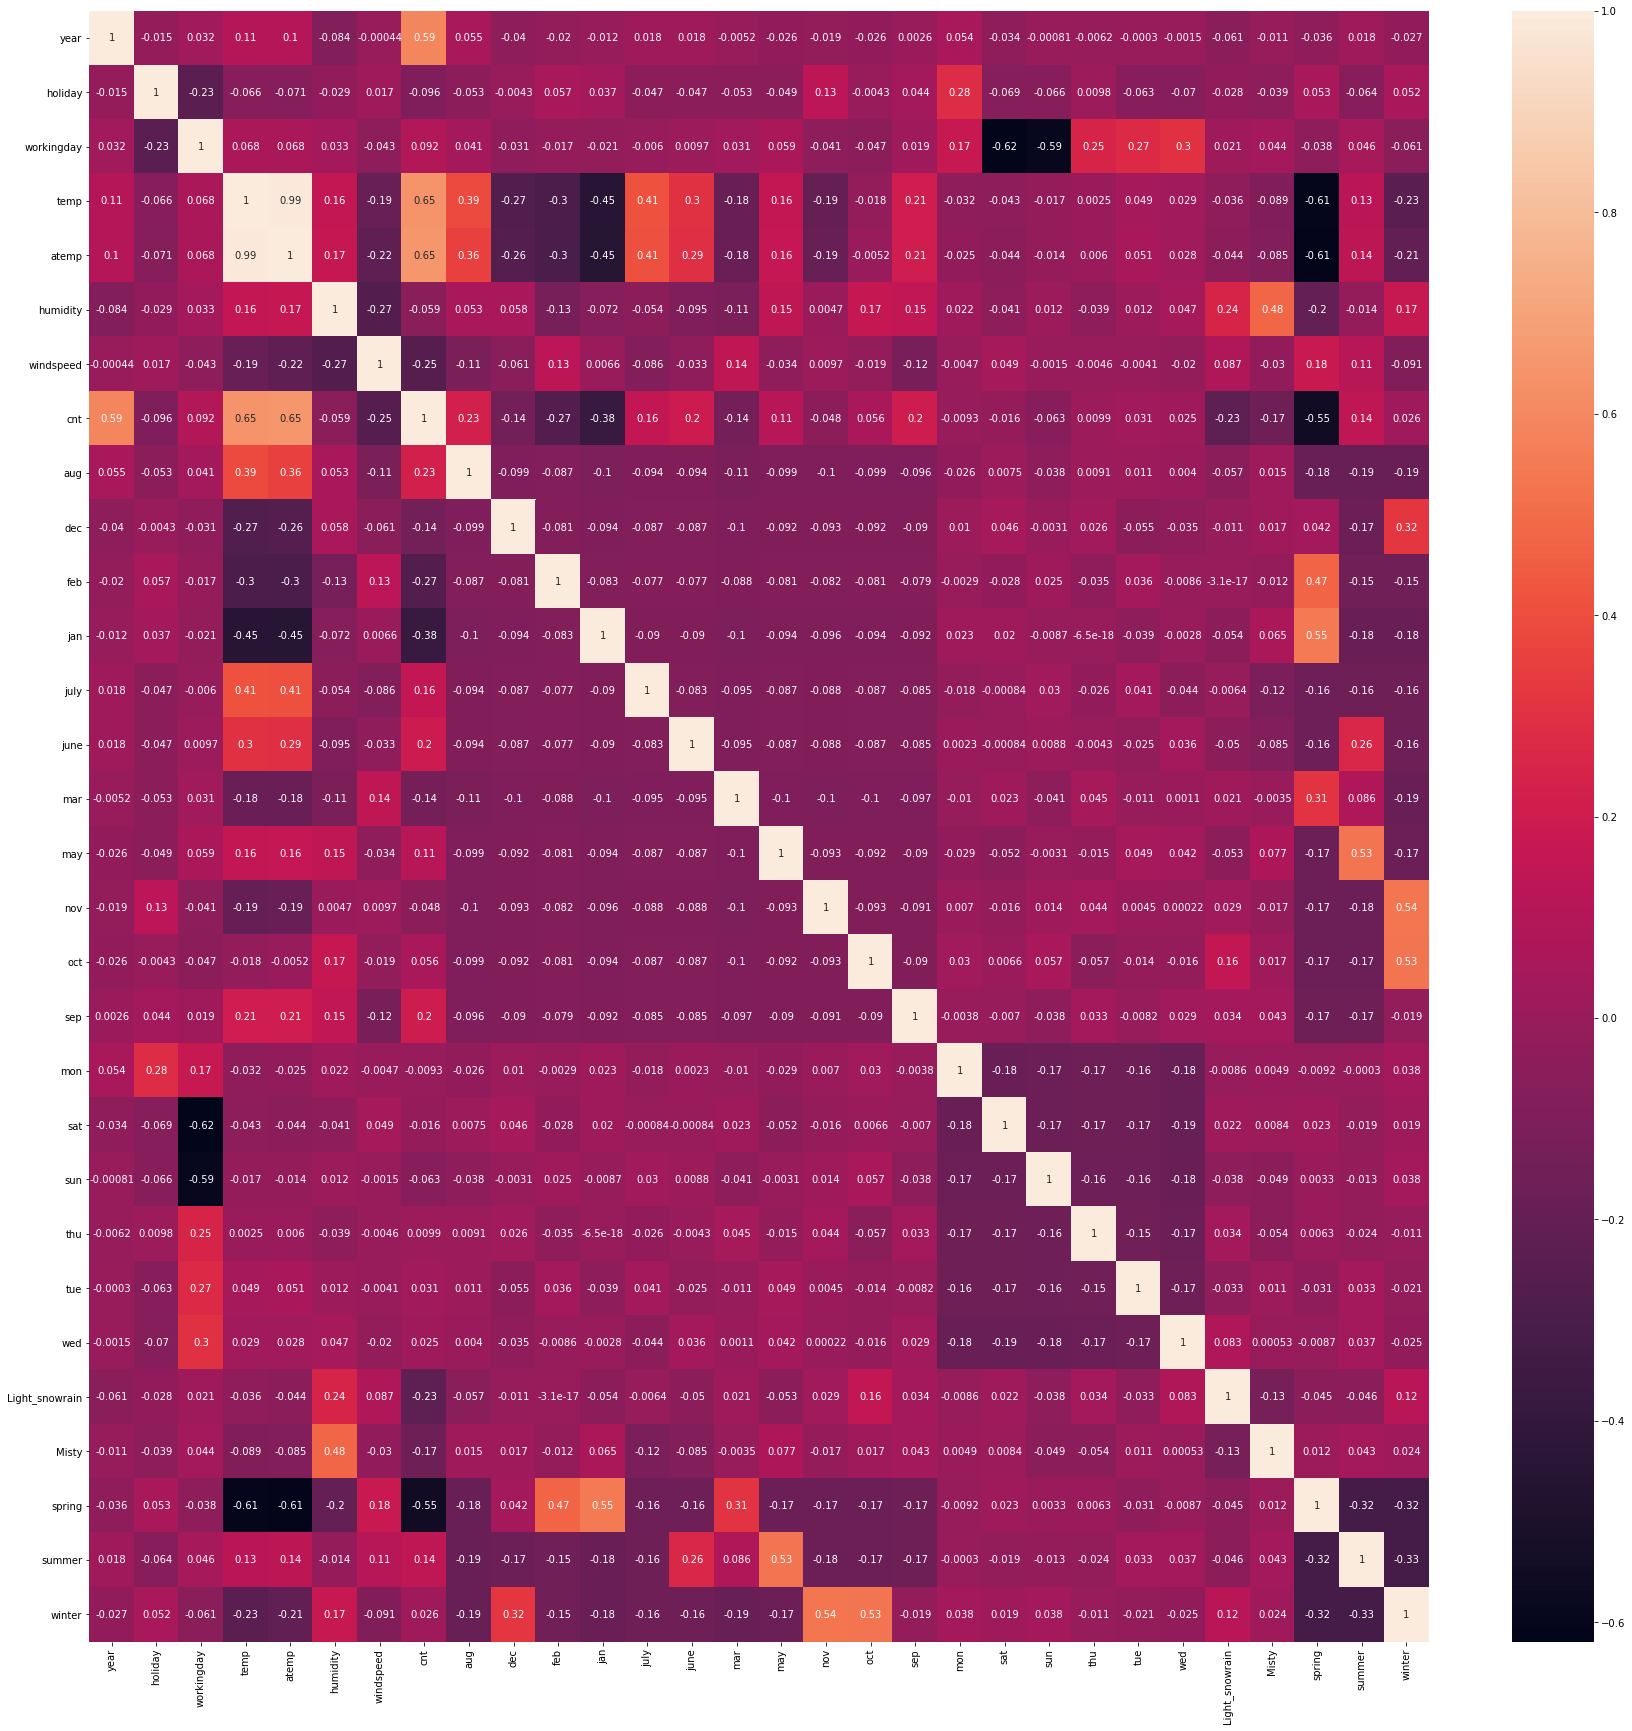

In [50]:
## To check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,30))
matrix = np.triu(rental_bike_train.corr())
sns.heatmap(rental_bike_train.corr(), annot = True)
plt.show()

#### From the above heatmap, we can see the cnt seems to have correlation with temp & year. Similarly, Misty and humidity have shown good  correlation. Spring season with Jan and Feb month, Summer season with may month & Winter season with oct and nov have also shown good correlation.

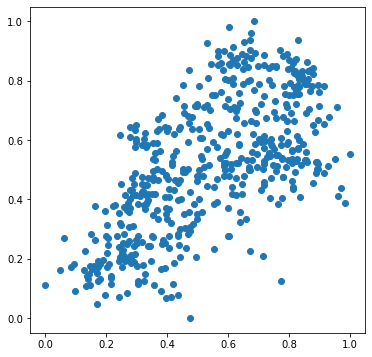

In [51]:
# Now, we will Visualize one of the correlation to check  the trends in Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(rental_bike_train.temp, rental_bike_train.cnt)
plt.show()

We can observe that there is a  positive correlation between temp and cnt.

In [52]:
# So, we will Build the Linear Model

y_train = rental_bike_train.pop('cnt')
x_train = rental_bike_train

In [53]:
# We shall use the recursive feature elimination 

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 12)
rfe = rfe.fit(x_train, y_train)

In [54]:
# # We can check List of variables selected in top 15 list

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 17),
 ('mar', False, 18),
 ('may', False, 9),
 ('nov', False, 5),
 ('oct', False, 16),
 ('sep', True, 1),
 ('mon', False, 12),
 ('sat', False, 2),
 ('sun', False, 11),
 ('thu', False, 14),
 ('tue', False, 13),
 ('wed', False, 15),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [55]:
# Now, select the selected variable via RFE in col list

col = x_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'july', 'sep',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [56]:
# To check which columns have been rejected

x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [57]:
# We acn use the generic function to calculate VIF of variables

def calculateVIF(rental_bike):
    vif = pd.DataFrame()
    vif['Features'] = rental_bike.columns
    vif['VIF'] = [variance_inflation_factor(rental_bike.values, i) for i in range(rental_bike.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
# dataframe with RFE selected variables

x_train_rfe = x_train[col]

In [59]:
# calculate VIF

calculateVIF(x_train_rfe)

Features    VIF
3         humidity  28.03
2             temp  16.03
4        windspeed   4.65
9           spring   4.01
11          winter   3.33
10          summer   2.79
8            Misty   2.28
0             year   2.08
5             july   1.58
6              sep   1.38
7   Light_snowrain   1.24
1          holiday   1.04

Here the humidity shows the highest VIF value.

## Step 5: Building a linear model

In [60]:
# Now, we shall Build the 1st linear regression model

x_train_lm_1 = sm.add_constant(x_train_rfe)
lr_1 = sm.OLS(y_train,x_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.95e-190
Time:                        22:55:46   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2848      0.034      8.

In [61]:
x_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  aug  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686    0   
426     1        0           0  0.442393  0.438975  0.640189   0.255342    0   
728     1        0           0  0.245101  0.200348  0.498067   0.663106    0   
482     1        0           0  0.395666  0.391735  0.504508   0.188475    0   
111     0        0           1  0.345824  0.318819  0.751824   0.380981    0   

     dec  feb  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
576    0    0  ...    0    0    0    1    0               0      0       0   
426    0    0  ...    1    0    0    0    0               0      1       1   
728    1    0  ...    0    1    0    0    0               0      0       1   
482    0    0  ...    1    0    0    0    0               0      1       0   
111    0    0  ...    0    0    0    0    0               0      1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 29 columns]

In [62]:
# As we can see  humidity shows high VIF values hence we can drop it
x_train_new = x_train_rfe.drop(['humidity'], axis = 1)

# Now, we will Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

Features   VIF
2             temp  5.09
3        windspeed  4.60
9           summer  2.23
8           spring  2.08
0             year  2.07
10          winter  1.78
4             july  1.58
7            Misty  1.55
5              sep  1.34
6   Light_snowrain  1.08
1          holiday  1.04

As VIF values seems to be good now, we shall check if we can reduce further

In [63]:
# Now shall Build 2nd regression model

x_train_lm_2 = sm.add_constant(x_train_new)
lr_2 = sm.OLS(y_train,x_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.06e-187
Time:                        22:55:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

VIF  seems not to be affected much after dropping few variables.So, we shall proceed to observe better model.

In [64]:
calculateVIF(x_train_lm_2.iloc[:,1:])

Features   VIF
2             temp  5.09
3        windspeed  4.60
9           summer  2.23
8           spring  2.08
0             year  2.07
10          winter  1.78
4             july  1.58
7            Misty  1.55
5              sep  1.34
6   Light_snowrain  1.08
1          holiday  1.04

The temp variable is just more than 5 , p value of temp is less,so we can consider temp as a good indicator for bike rental

 **So We can cosider the above model i.e lr_2, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant**

In [65]:
# To Check the parameters and their coefficient values
lr_2.params

const             0.199434
year              0.233570
holiday          -0.097463
temp              0.490988
windspeed        -0.147919
july             -0.052057
sep               0.076846
Light_snowrain   -0.284199
Misty            -0.080167
spring           -0.067169
summer            0.046487
winter            0.081741
dtype: float64

## Step 6:  We shall perform Residual Analysis of the train data and validation

In [66]:
x_train_lm_2

const  year  holiday      temp  windspeed  july  sep  Light_snowrain  \
576    1.0     1        0  0.815169   0.264686     1    0               0   
426    1.0     1        0  0.442393   0.255342     0    0               0   
728    1.0     1        0  0.245101   0.663106     0    0               0   
482    1.0     1        0  0.395666   0.188475     0    0               0   
111    1.0     0        0  0.345824   0.380981     0    0               0   
..     ...   ...      ...       ...        ...   ...  ...             ...   
578    1.0     1        0  0.863973   0.187140     0    0               0   
53     1.0     0        0  0.202618   0.111379     0    0               0   
350    1.0     0        0  0.248216   0.431816     0    0               0   
79     1.0     0        0  0.462664   0.529881     0    0               0   
520    1.0     1        0  0.600225   0.359599     0    0               0   

     Misty  spring  summer  winter  
576      0       0       0       0  
426      1       1       0       0  
728      0       1       0       0  
482      1       0       1       0  
111      1       0       1       0  
..     ...     ...     ...     ...  
578      0       0       0       0  
53       0       1       0       0  
350      1       0       0       1  
79       1       0       1       0  
520      1       0       1       0  

[510 rows x 12 columns]

In [67]:
y_train_pred = lr_2.predict(x_train_lm_2)

#### Normality of error terms

Text(0.5, 0, 'Errors')

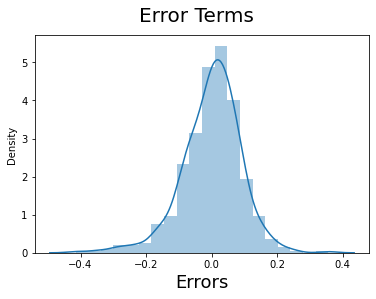

In [68]:
# let's Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

#### Multi Colinearity

In [69]:
calculateVIF(x_train_new)

Features   VIF
2             temp  5.09
3        windspeed  4.60
9           summer  2.23
8           spring  2.08
0             year  2.07
10          winter  1.78
4             july  1.58
7            Misty  1.55
5              sep  1.34
6   Light_snowrain  1.08
1          holiday  1.04

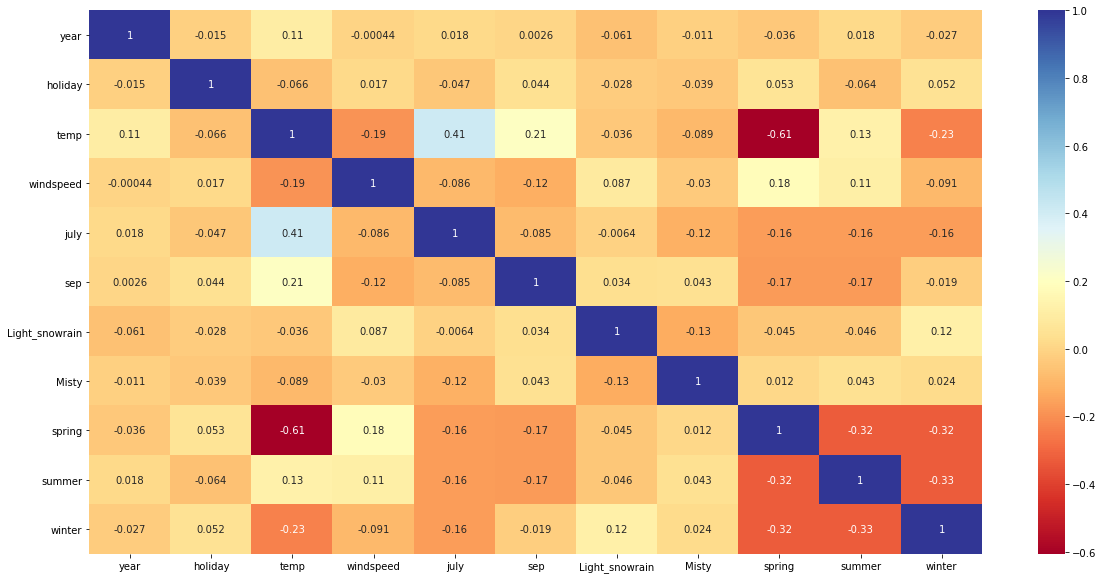

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train_new.corr(),annot = True, cmap="RdYlBu")
plt.show()

 There is no multicolinearity as seen from the heatmap.

#### Homoscedasticity

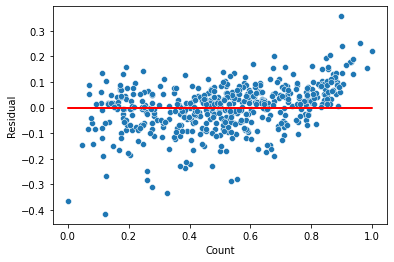

In [71]:
y_train_pred = lr_2.predict(x_train_lm_2)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_2 is 2.051, which signifies there is no auto-correlation.

##  Predictions Using the Final Model

Now see the fitted  model and checked the normality of error terms,will make predictions using the final, i.e. 2nd model.

In [72]:
# let's Apply scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
rental_bike_test[num_vars] = scaler.transform(rental_bike_test[num_vars])
rental_bike_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.831783  0.769660  0.657364   0.084219   
535     1        0           1  0.901354  0.842587  0.610133   0.153728   
299     0        0           1  0.511964  0.496145  0.837699   0.334206   
221     0        0           1  0.881625  0.795343  0.437098   0.339570   
152     0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  0.692706    0    0  ...    0    0    0    0    0               0      1   
535  0.712034    0    0  ...    0    0    0    0    1               0      0   
299  0.303382    0    0  ...    0    0    1    0    0               0      1   
221  0.547400    1    0  ...    0    0    0    0    1               0      0   
152  0.569029    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [73]:
rental_bike_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt         aug         dec  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.059091    0.086364  ...    0.118182   
std      0.159584    0.219163    0.236333    0.281541  ...    0.323559   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  220.000000  220.000000  220.000000  220.000000      220.000000   
mean     0.145455    0.163636    0.168182    0.100000        0.027273   
std      0.353363    0.370789    0.374881    0.300684        0.163248   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.318182    0.254545    0.263636    0.236364  
std      0.466833    0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [74]:
y_test = rental_bike_test.pop('cnt')
x_test = rental_bike_test

In [75]:
col1 = x_train_new.columns

x_test = x_test[col1]

# Adding constant variable to test dataframe
x_test_lm_2 = sm.add_constant(x_test)

In [76]:
y_pred = lr_2.predict(x_test_lm_2)

In [77]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8053

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

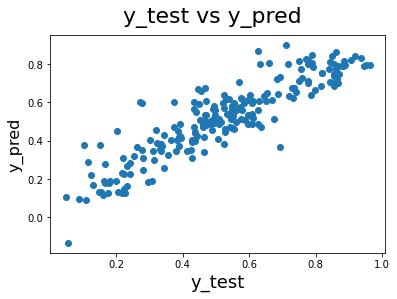

In [78]:
# Let's Plot y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 22) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [79]:
round(lr_2.params,4)

const             0.1994
year              0.2336
holiday          -0.0975
temp              0.4910
windspeed        -0.1479
july             -0.0521
sep               0.0768
Light_snowrain   -0.2842
Misty            -0.0802
spring           -0.0672
summer            0.0465
winter            0.0817
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.1994 + 0.2336  \times  year - 0.0975  \times  holiday + 0.4910 \times temp - 0.1479 \times windspeed -0.0521 \times july + 0.0768 \times sep - 0.2842 \times Light_snowrain - 0.0802 \times Misty - 0.0572 \times spring + 0.0465 \times summer + 0.0817 \times winter $

In [80]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.795


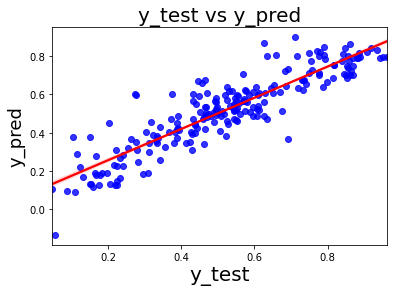

In [81]:
# Let'sVisualizing the fit on the test data
# Now we can plot the Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=18)
plt.show()

## Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.835
    - Test dataset R^2           : 0.8053
    - Train dataset Adjusted R^2 : 0.832    
    - Test dataset Adjusted R^2  : 0.795

## So we can conclude that the demand of the bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.
